# STATISTICS & ML PROJECT - CREDIT DEFAULT PREDICTION

## GROUP 10 TEAM MEMBERS - 
### Marijose Marcos I.  |   Kamalakannan Thayanidhi | Swasthik Vellingirikowsalya

In [1]:
# Importing all the Necessary Package 
# Data exploration
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

# Data processing
import pickle
import numpy as np
import pandas as pd
import os
import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
#from lightgbm import LGBMClassifier

# Experimental setup
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV, train_test_split
#from imblearn.over_sampling import SMOTE, RandomOverSampler
#from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.stats          import pearsonr

In [2]:
###################################################################
# MODIFY THESE FLAGS TO TURN ON/OFF THE DATA PROCESSING FUNCTIONS #
###################################################################

# Flag variables to run the data processing steps
# Feature engineering step
enable_num_poly = True  # Add polynomial terms
# Value transformation step
enable_trans_cat_dt = True  # Remapping cat variables - Decision tree–based remapping
enable_trans_num_dt = True  # Discretizing num variables - Decision tree–based discretization
enable_trans_num_ef = True  # Discretizing num variables - Equal frequency discretization
enable_trans_num_ew = True  # Discretizing num variables - Equal width discretization
# Value representation step
enable_repr_dummy = True  # Represent cat variables - Dummy coding
enable_repr_icd = True  # Represent cat variables - Incidence (of target variable) replacement
enable_repr_woe = True  # Represent cat variables - Weight-of-Evidence (WoE) conversion
drop_cat_vars = True  # Drop cat variables after value representation step
# Other data processing
enable_normalize = True  # Normalize the data to the same range [0, 1]

### Importing Data 

In [3]:
# Read train, test
train = pd.read_csv('credit_default_train.csv', low_memory=False)
test = pd.read_csv('credit_default_test.csv', low_memory=False)

In [4]:
# Print out to check the data
print(train.dtypes.value_counts())
train.head()

float64    23
int64       2
dtype: int64


,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [5]:
train[train['default.payment.next.month'] == 1]

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1
8,4761,320000.0,2.0,2.0,2.0,36.0,-2.0,-2.0,-2.0,-2.0,...,15813.0,0.0,0.0,5000.0,4905.0,15873.0,0.0,0.0,21657.0,1
12,2757,80000.0,2.0,2.0,2.0,29.0,0.0,0.0,0.0,2.0,...,64714.0,62420.0,62990.0,2753.0,3438.0,4400.0,0.0,2400.0,9974.0,1
19,6170,20000.0,1.0,3.0,1.0,52.0,1.0,2.0,0.0,0.0,...,19845.0,0.0,0.0,0.0,1200.0,397.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,18182,180000.0,2.0,1.0,1.0,33.0,-1.0,0.0,0.0,0.0,...,2301.0,2364.0,2286.0,1503.0,1400.0,250.0,228.0,106.0,1601.0,1
19984,5605,70000.0,2.0,3.0,1.0,53.0,2.0,2.0,2.0,2.0,...,56814.0,58053.0,59246.0,2600.0,0.0,4400.0,2300.0,2300.0,2100.0,1
19990,15031,160000.0,2.0,1.0,1.0,33.0,-1.0,2.0,2.0,-2.0,...,600.0,65000.0,2206.0,0.0,3161.0,0.0,65000.0,2206.0,339.0,1
19994,1650,30000.0,1.0,2.0,1.0,33.0,0.0,0.0,0.0,0.0,...,26404.0,25806.0,26325.0,1500.0,1433.0,1500.0,920.0,929.0,0.0,1


## DATA PRE - PROCESSING 

In [6]:
train['C_PAY_0'] = train['PAY_0']
train['C_PAY_2'] = train['PAY_2']
train['C_PAY_3'] = train['PAY_3']
train['C_PAY_4'] = train['PAY_4']
train['C_PAY_5'] = train['PAY_5']
train['C_PAY_6'] = train['PAY_6']

test['C_PAY_0'] = test['PAY_0']
test['C_PAY_2'] = test['PAY_2']
test['C_PAY_3'] = test['PAY_3']
test['C_PAY_4'] = test['PAY_4']
test['C_PAY_5'] = test['PAY_5']
test['C_PAY_6'] = test['PAY_6']

In [7]:
id_var = ["cust_id"]  # ID
target_var = ["default.payment.next.month"]  # Target get variable
predictors = [v for v in train.columns if v not in id_var + target_var]

# List of numerical and catergorical variables
num_vars = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE','C_PAY_0','C_PAY_2','C_PAY_3','C_PAY_4','C_PAY_5','C_PAY_6']

# Double check the list of variables
assert(len(predictors) == len(num_vars) + len(cat_vars))

In [8]:
# By number
print(train[target_var].value_counts())

# By percentage
print(train[target_var].value_counts(normalize=True))

default.payment.next.month
0                             15586
1                              4414
dtype: int64
default.payment.next.month
0                             0.7793
1                             0.2207
dtype: float64


In [9]:
# Here, we test the effect of dropping variables with high missing percentage (>30%)
na_threshold = 0.3

# Drop num variables with more than 30% missing values
num_na_pct = train[num_vars].isnull().mean()
num_vars = num_na_pct[num_na_pct <= na_threshold].index.tolist()
print("Drop num variables with high missing pct:", num_na_pct[num_na_pct > na_threshold].tolist())

# Drop cat variables with more than 30% missing values
cat_na_pct = train[cat_vars].isnull().mean()
cat_vars = cat_na_pct[cat_na_pct <= 0.3].index.tolist()
print("Drop cat variables with high missing pct:", cat_na_pct[cat_na_pct > na_threshold].tolist())

# Update train, test
train = train[id_var + num_vars + cat_vars + target_var]
test = test[id_var + num_vars + cat_vars]

Drop num variables with high missing pct: []
Drop cat variables with high missing pct: []


In [10]:
na_vars = []
imp = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imp.fit(train[num_vars])

# Reconstruct the list of vars + indicators
na_vars = na_vars + [num_vars[v] + "_na" for v in imp.indicator_.features_]
impute_vars = num_vars + na_vars

# Apply on train, test
train[impute_vars] = pd.DataFrame(imp.transform(train[num_vars]), columns=impute_vars)
test[impute_vars] = pd.DataFrame(imp.transform(test[num_vars]), columns=impute_vars)

In [11]:
train[cat_vars] = train[cat_vars].fillna('Missing')
test[cat_vars] = test[cat_vars].fillna('Missing')

In [12]:
test.isna().sum().sum()

0

In [13]:
train.isna().sum().sum()

0

In [14]:
train.columns

Index(['cust_id', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE',
       'C_PAY_0', 'C_PAY_2', 'C_PAY_3', 'C_PAY_4', 'C_PAY_5', 'C_PAY_6',
       'default.payment.next.month', 'LIMIT_BAL_na', 'AGE_na', 'BILL_AMT1_na',
       'BILL_AMT2_na', 'BILL_AMT3_na', 'BILL_AMT4_na', 'BILL_AMT5_na',
       'BILL_AMT6_na', 'PAY_AMT1_na', 'PAY_AMT2_na', 'PAY_AMT3_na',
       'PAY_AMT4_na', 'PAY_AMT5_na', 'PAY_AMT6_na', 'PAY_0_na', 'PAY_2_na',
       'PAY_3_na', 'PAY_4_na', 'PAY_5_na', 'PAY_6_na'],
      dtype='object')

In [15]:
train.dtypes

cust_id                         int64
LIMIT_BAL                     float64
AGE                           float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
C_PAY_0                        object
C_PAY_2                        object
C_PAY_3     

In [16]:
test.columns

Index(['cust_id', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE',
       'C_PAY_0', 'C_PAY_2', 'C_PAY_3', 'C_PAY_4', 'C_PAY_5', 'C_PAY_6',
       'LIMIT_BAL_na', 'AGE_na', 'BILL_AMT1_na', 'BILL_AMT2_na',
       'BILL_AMT3_na', 'BILL_AMT4_na', 'BILL_AMT5_na', 'BILL_AMT6_na',
       'PAY_AMT1_na', 'PAY_AMT2_na', 'PAY_AMT3_na', 'PAY_AMT4_na',
       'PAY_AMT5_na', 'PAY_AMT6_na', 'PAY_0_na', 'PAY_2_na', 'PAY_3_na',
       'PAY_4_na', 'PAY_5_na', 'PAY_6_na'],
      dtype='object')

### Feature Engineering

#### Creating New Variables from Exisiting Variables 

In [17]:
#Total Payment Per Customer 
train['total_pay']=train['PAY_AMT1']+train['PAY_AMT2']+train['PAY_AMT3']+train['PAY_AMT4']+train['PAY_AMT5']+train['PAY_AMT6']
test['total_pay']=test['PAY_AMT1']+test['PAY_AMT2']+test['PAY_AMT3']+test['PAY_AMT4']+test['PAY_AMT5']+test['PAY_AMT6']

In [18]:
#Total Bill Per Customer
train['Total_Bill'] = train['BILL_AMT1']+train['BILL_AMT2']+train['BILL_AMT3']+train['BILL_AMT4']+train['BILL_AMT5']+train['BILL_AMT6']
test['Total_Bill'] = test['BILL_AMT1']+test['BILL_AMT2']+test['BILL_AMT3']+test['BILL_AMT4']+test['BILL_AMT5']+test['BILL_AMT6']

In [19]:
#Max, Min of Pay & Bill 
train["Max_Pay"] = train[["PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].max(axis=1)
test["Max_Pay"] = test[["PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].max(axis=1)

train["Min_Pay"] = train[["PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].min(axis=1)
test["Min_Pay"] = test[["PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].min(axis=1)


train["Max_Bill"] = train[["BILL_AMT1", "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].max(axis=1)
test["Max_Bill"] = test[["BILL_AMT1", "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].max(axis=1)

train["Min_Bill"] = train[["BILL_AMT1", "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].min(axis=1)
test["Min_Bill"] = test[["BILL_AMT1", "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].min(axis=1)

In [20]:
#Average Payment Per Customer 
train['avg_pay']  = train['total_pay']/6
test['avg_pay'] = test['total_pay']/6
#Average Bill Amount Per Customer 

train['avg_bill']  = train['Total_Bill']/6
test['avg_bill'] = test['Total_Bill']/6

In [21]:
# Average Month Delay in Payment by customer 
train['avg_dly'] = (train['PAY_0']+train['PAY_2']+train['PAY_3']+train['PAY_4']+train['PAY_5']+train['PAY_6'])/6
test['avg_dly'] = (test['PAY_0']+test['PAY_2']+test['PAY_3']+test['PAY_4']+test['PAY_5']+test['PAY_6'])/6

In [22]:
# Max, Min Month Delay in Payment by customer 
train['Max_dly'] =  train[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)
test['Max_dly'] = test[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)

train['Min_dly'] = train[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].min(axis=1)
test['Min_dly'] = test[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].min(axis=1)

In [23]:
#Using Limit Balance To create additional variables 
train['Limit_Bal_Max_Bill'] = train['LIMIT_BAL']/(train["Max_Bill"] + 1)
train['Limit_Bal_Avg_Bill'] = train['LIMIT_BAL']/(train["avg_bill"] + 1)
train['Limit_Bal_Max_Avg'] = train['Limit_Bal_Max_Bill']/train['Limit_Bal_Avg_Bill']

In [24]:
test['Limit_Bal_Max_Bill'] = test['LIMIT_BAL']/(test["Max_Bill"] + 1)
test['Limit_Bal_Avg_Bill'] = test['LIMIT_BAL']/(test["avg_bill"] + 1)
test['Limit_Bal_Max_Avg'] = test['Limit_Bal_Max_Bill']/test['Limit_Bal_Avg_Bill']

In [25]:
train['Avg_Payment_%'] = train['avg_bill'] / train['avg_pay']
test['Avg_Payment_%'] = test['avg_bill'] / test['avg_pay']

In [26]:
train['Avg_Payment_%'] = train['Avg_Payment_%'].fillna(0)
test['Avg_Payment_%'] = test['Avg_Payment_%'].fillna(0)

In [27]:
train.shape

(20000, 66)

In [28]:
test.shape

(10000, 65)

In [29]:
train.head(15)

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,Min_Bill,avg_pay,avg_bill,avg_dly,Max_dly,Min_dly,Limit_Bal_Max_Bill,Limit_Bal_Avg_Bill,Limit_Bal_Max_Avg,Avg_Payment_%
0,18895,70000.0,34.0,53972.000000,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,...,23149.0,1533.333333,29916.166667,0.000000,0.0,0.0,1.296945,2.339794,0.554299,19.510543
1,25102,390000.0,26.0,185111.000000,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,...,115514.0,4158.000000,149297.333333,1.000000,2.0,0.0,2.106833,2.612219,0.806530,35.906045
2,28867,60000.0,27.0,21387.000000,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,...,21387.0,1617.833333,24981.500000,0.333333,2.0,0.0,2.097315,2.401681,0.873270,15.441331
3,1842,140000.0,55.0,108038.000000,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,...,61298.0,2781.166667,83108.666667,0.000000,0.0,0.0,1.270221,1.684521,0.754055,29.882663
4,3371,50000.0,29.0,7881.000000,10415.0,3997.0,1047.0,0.0,0.0,3000.0,...,0.0,666.666667,3890.000000,0.666667,2.0,-2.0,4.800307,12.850167,0.373560,5.835000
5,29925,20000.0,37.0,20009.000000,20602.0,21255.0,19105.0,19609.0,19283.0,1700.0,...,19105.0,1233.333333,19977.166667,0.000000,0.0,0.0,0.940911,1.001093,0.939884,16.197703
6,29940,50000.0,44.0,51041.121726,50525.0,51463.0,49952.0,19584.0,19080.0,1762.0,...,19080.0,1516.500000,40274.186954,0.333333,2.0,0.0,0.971553,1.241459,0.782590,26.557327
7,11638,250000.0,30.0,5724.000000,6729.0,4973.0,9693.0,799.0,4295.0,2000.0,...,799.0,2221.666667,5368.833333,0.000000,2.0,-1.0,25.789148,46.556380,0.553934,2.416579
8,4761,320000.0,36.0,29862.000000,33785.0,4900.0,15813.0,0.0,0.0,5000.0,...,0.0,7905.833333,14060.000000,-2.000000,-2.0,-2.0,9.471379,22.757983,0.416178,1.778434
9,6746,300000.0,35.0,91282.000000,45885.0,35329.0,29368.0,18833.0,93329.0,3260.0,...,18833.0,15314.833333,52337.666667,0.000000,0.0,0.0,3.214401,5.731900,0.560791,3.417449


In [30]:
train.columns

Index(['cust_id', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE',
       'C_PAY_0', 'C_PAY_2', 'C_PAY_3', 'C_PAY_4', 'C_PAY_5', 'C_PAY_6',
       'default.payment.next.month', 'LIMIT_BAL_na', 'AGE_na', 'BILL_AMT1_na',
       'BILL_AMT2_na', 'BILL_AMT3_na', 'BILL_AMT4_na', 'BILL_AMT5_na',
       'BILL_AMT6_na', 'PAY_AMT1_na', 'PAY_AMT2_na', 'PAY_AMT3_na',
       'PAY_AMT4_na', 'PAY_AMT5_na', 'PAY_AMT6_na', 'PAY_0_na', 'PAY_2_na',
       'PAY_3_na', 'PAY_4_na', 'PAY_5_na', 'PAY_6_na', 'total_pay',
       'Total_Bill', 'Max_Pay', 'Min_Pay', 'Max_Bill', 'Min_Bill', 'avg_pay',
       'avg_bill', 'avg_dly', 'Max_dly', 'Min_dly', 'Limit_Bal_Max_Bill',
       'Limit_Bal_Avg_Bill', 'Limit_Bal_Max_Avg', 'Avg_Payment_%'],
      dtype='object')

In [31]:
test.isna().sum().sum()

2

In [32]:
train.isna().sum().sum()

0

In [33]:
train[train["Max_Bill"] == 0].head(569)

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,Min_Bill,avg_pay,avg_bill,avg_dly,Max_dly,Min_dly,Limit_Bal_Max_Bill,Limit_Bal_Avg_Bill,Limit_Bal_Max_Avg,Avg_Payment_%
24,1614,200000.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,110.833333,0.0,-2.000000,-2.0,-2.0,200000.0,200000.0,1.0,0.0
165,5015,200000.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4671.166667,0.0,-1.500000,1.0,-2.0,200000.0,200000.0,1.0,0.0
221,9426,50000.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,-1.500000,1.0,-2.0,50000.0,50000.0,1.0,0.0
277,24017,130000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,-2.000000,-2.0,-2.0,130000.0,130000.0,1.0,0.0
302,12304,180000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,-1.500000,1.0,-2.0,180000.0,180000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,15577,340000.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,-2.000000,-2.0,-2.0,340000.0,340000.0,1.0,0.0
19837,19899,120000.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,-2.000000,-2.0,-2.0,120000.0,120000.0,1.0,0.0
19838,19353,150000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,-1.188447,1.0,-2.0,150000.0,150000.0,1.0,0.0
19853,11073,200000.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,-2.000000,-2.0,-2.0,200000.0,200000.0,1.0,0.0


In [34]:
train.replace([np.inf, -np.inf], 0, inplace=True)
test.replace([np.inf, -np.inf], 0, inplace=True)

In [35]:
test = test.fillna(0)

### Encoding Categorical Vairables

In [36]:
# Encode categorical variables as integer values
enc = OrdinalEncoder()
enc.fit(pd.concat([train[cat_vars].astype(str), test[cat_vars].astype(str)], axis=0))
# Apply on train, test
train[cat_vars] = enc.transform(train[cat_vars].astype(str))
test[cat_vars] = enc.transform(test[cat_vars].astype(str))

In [37]:
train[na_vars] = train[na_vars].astype(np.int8)
test[na_vars] = test[na_vars].astype(np.int8)

In [38]:
# List of numerical and catergorical variables
num_vars = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3',
            'PAY_4', 'PAY_5', 'PAY_6','total_pay','Total_Bill', 'Max_Pay', 'Min_Pay', 'Max_Bill', 'Min_Bill', 
            'avg_pay','avg_bill', 'avg_dly', 'Max_dly', 'Min_dly', 'Limit_Bal_Max_Bill',
            'Limit_Bal_Avg_Bill','Limit_Bal_Max_Avg', 'Avg_Payment_%' ]
# Print out the final variables
print("# id_var [", len(id_var), "] :", id_var)
print("# num_vars [", len(num_vars), "] :", num_vars[:5], "...")
print("# cat_vars [", len(cat_vars), "] :", cat_vars[:5], "...")
print("# na_vars [", len(na_vars), "] :", na_vars[:5], "...")
print("# target_var [", len(target_var), "] :", target_var)

# id_var [ 1 ] : ['cust_id']
# num_vars [ 35 ] : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3'] ...
# cat_vars [ 9 ] : ['SEX', 'EDUCATION', 'MARRIAGE', 'C_PAY_0', 'C_PAY_2'] ...
# na_vars [ 20 ] : ['LIMIT_BAL_na', 'AGE_na', 'BILL_AMT1_na', 'BILL_AMT2_na', 'BILL_AMT3_na'] ...
# target_var [ 1 ] : ['default.payment.next.month']


In [39]:
train.isna().sum().sum()

0

In [40]:
test.isna().sum().sum()

0

In [41]:
# List of variables to track the value transformation process
trans_vars = []

In [42]:
if enable_trans_cat_dt:
    for v in cat_vars:
        # Find the best decision tree using CV
        cv = KFold(n_splits=20, random_state=1, shuffle=True)
        model = DecisionTreeClassifier()
        parameters = {'min_samples_leaf':(train.shape[0]*np.array([0.01,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.1,0.15,0.2,0.25,0.3,0.35,0.45,0.4,0.5])).astype(int)}
        clf = GridSearchCV(model, parameters, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=0)
        clf.fit(train[[v]], train[target_var])
        # Remap the variable on train, test
        if (clf.best_score_ > 0.5) & (clf.best_estimator_.get_n_leaves() > 1):
            print("Remapping variable", v,
                  "from", train[[v]].nunique().values[0],
                  "to", clf.best_estimator_.get_n_leaves(), "categories")
            remap_var = v + '_remap'
            trans_vars.append(remap_var)
            train[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(train[[v]]).toarray()]
            test[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(test[[v]]).toarray()]

Remapping variable SEX from 3 to 2 categories
Remapping variable EDUCATION from 8 to 5 categories
Remapping variable MARRIAGE from 5 to 2 categories
Remapping variable C_PAY_0 from 12 to 7 categories
Remapping variable C_PAY_2 from 12 to 6 categories
Remapping variable C_PAY_3 from 12 to 6 categories
Remapping variable C_PAY_4 from 12 to 6 categories
Remapping variable C_PAY_5 from 11 to 5 categories
Remapping variable C_PAY_6 from 11 to 5 categories


In [43]:
if enable_trans_num_dt:
    for v in num_vars:
        # Find the best decision tree using CV
        cv = KFold(n_splits=20, random_state=1, shuffle=True)
        model = DecisionTreeClassifier()
        parameters = {'min_samples_leaf':(train.shape[0]*np.array([0.01,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.1,0.15,0.2,0.25,0.3,0.35,0.45,0.4,0.5])).astype(int)}
        clf = GridSearchCV(model, parameters, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=0)
        clf.fit(train[[v]], train[target_var])
        # Remap the variable on train, test
        if (clf.best_score_ > 0.5) & (clf.best_estimator_.get_n_leaves() > 1):
            print("Discretize variable", v,
                  "from", [train[[v]].min().values[0], train[[v]].max().values[0]],
                  "to", clf.best_estimator_.get_n_leaves(), "categories")
            remap_var = v + '_bin'
            trans_vars.append(remap_var)
            train[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(train[[v]]).toarray()]
            test[remap_var] = [np.nonzero(r)[0].max() for r in clf.best_estimator_.decision_path(test[[v]]).toarray()]

Discretize variable LIMIT_BAL from [10000.0, 1000000.0] to 20 categories
Discretize variable AGE from [21.0, 75.0] to 7 categories
Discretize variable BILL_AMT1 from [-165580.0, 964511.0] to 12 categories
Discretize variable BILL_AMT2 from [-69777.0, 983931.0] to 11 categories
Discretize variable BILL_AMT3 from [-61506.0, 1664089.0] to 75 categories
Discretize variable BILL_AMT4 from [-170000.0, 891586.0] to 35 categories
Discretize variable BILL_AMT5 from [-81334.0, 927171.0] to 22 categories
Discretize variable BILL_AMT6 from [-339603.0, 961664.0] to 13 categories
Discretize variable PAY_AMT1 from [0.0, 505000.0] to 25 categories
Discretize variable PAY_AMT2 from [0.0, 1684259.0] to 8 categories
Discretize variable PAY_AMT3 from [0.0, 896040.0] to 30 categories
Discretize variable PAY_AMT4 from [0.0, 528897.0] to 11 categories
Discretize variable PAY_AMT5 from [0.0, 388071.0] to 7 categories
Discretize variable PAY_AMT6 from [0.0, 528666.0] to 20 categories
Discretize variable PAY_0 

In [44]:
if enable_trans_num_ef:
    for v in num_vars:
        # Binning values of a variable
        est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
        est.fit(train[[v]])
        # Bin the variable on train, test
        if est.n_bins_[0] > 1:
            binef_var = v + '_binef'
            trans_vars.append(binef_var)
            train[binef_var] = est.transform(train[[v]])
            test[binef_var] = est.transform(test[[v]])

C:\Users\kamal\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\kamal\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\kamal\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\kamal\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\kamal\anaconda3\lib\site-packages\sklearn\preprocessing\_discre

In [45]:
if enable_trans_num_ew:
    for v in num_vars:
        # Binning values of a variable
        est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
        est.fit(train[[v]])
        # Bin the variable on train, test
        if est.n_bins_[0] > 1:
            binew_var = v + '_binew'
            trans_vars.append(binew_var)
            train[binew_var] = est.transform(train[[v]])
            test[binew_var] = est.transform(test[[v]])

In [46]:
cat_vars = cat_vars + trans_vars
print("Transformed num, cat variables into # new categorical variables :", len(trans_vars))

Transformed num, cat variables into # new categorical variables : 114


In [47]:
train = train[id_var + num_vars + cat_vars + na_vars + target_var]
test = test[id_var + num_vars + cat_vars + na_vars]
print(train.shape)
print(test.shape)

(20000, 180)
(10000, 179)


In [48]:
# List of variables to track the value representation process
repr_vars = []
dummy_vars = []

In [49]:
if enable_repr_dummy:
    # Create dummy variables, drop the first dummy column
    enc = OneHotEncoder(drop="first", handle_unknown="error")
    enc.fit(pd.concat([train[cat_vars], test[cat_vars]], axis=0))
    dummy_vars = enc.get_feature_names_out().tolist()
    repr_vars = repr_vars + dummy_vars
    # Transform train, test
    train_dummy = enc.transform(train[cat_vars])
    test_dummy = enc.transform(test[cat_vars])

In [50]:
if enable_repr_icd:
    for v in cat_vars:
        # Find the incidence rates per category of a categorical variable
        tb = pd.pivot_table(train, values=target_var, index=v, aggfunc=np.mean).reset_index()
        icd_var = v + "_icd"
        repr_vars.append(icd_var)
        tb.columns = [v, icd_var]
        # Add the incidence column to train, test
        train[icd_var] = pd.merge(train[[v]], tb, on=v)[icd_var]
        test[icd_var] = pd.merge(test[[v]], tb, on=v)[icd_var]

In [51]:
if enable_repr_woe:
    for v in cat_vars:
        # Find the WoE per category of a categorical variable
        tb = train[[v] + target_var].value_counts().unstack(fill_value=0).reset_index()
        woe_var = v + "_woe"
        repr_vars.append(woe_var)
        e = 1e-10  # Small value
        tb[woe_var] = np.log((tb[1] + e) / (tb[0] + e))
        # Add the incidence column to train, test
        train[woe_var] = pd.merge(train[[v]], tb[[v, woe_var]], on=v)[woe_var]
        test[woe_var] = pd.merge(test[[v]], tb[[v, woe_var]], on=v)[woe_var]

In [52]:
if drop_cat_vars:
    train = train.drop(cat_vars, axis=1)
    test = test.drop(cat_vars, axis=1)
    cat_vars = []

In [53]:
if enable_repr_dummy:
    train = pd.concat([train, pd.DataFrame(train_dummy.toarray(), columns=dummy_vars)], axis=1)
    test = pd.concat([test, pd.DataFrame(test_dummy.toarray(), columns=dummy_vars)], axis=1)
    del train_dummy, test_dummy

In [54]:
if len(repr_vars) > 0:
    imp = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
    imp.fit(train[repr_vars])
    test[repr_vars] = pd.DataFrame(imp.transform(test[repr_vars]), columns=repr_vars)

In [55]:
# Combine the variable list
num_vars = num_vars + repr_vars
print("Represented cat variables with # new num variables :", len(repr_vars))

Represented cat variables with # new num variables : 1379


In [56]:
train = train[id_var + num_vars + cat_vars + na_vars + target_var]
test = test[id_var + num_vars + cat_vars + na_vars]
print(train.shape)
print(test.shape)

(20000, 1436)
(10000, 1435)


#### Normalization

In [57]:
# TODO: More efficient implementation
if enable_normalize:
    for v in num_vars:
        # Build the normalizer on train
        scaler = MinMaxScaler().fit(train[[v]])
        # Apply on train, test
        train[v] = scaler.transform(train[[v]])
        test[v] = scaler.transform(test[[v]])

In [58]:
# List of all predictors
predictors = num_vars + cat_vars + na_vars

In [59]:
sel = VarianceThreshold(0)  # Var = 0 by default
sel.fit(train[predictors])
const_vars = [predictors[i] for i in np.where(sel.variances_ == 0)[0]]
predictors = [v for v in predictors if v not in const_vars]

# Drop from train, test
print('Drop # constant vars :', len(const_vars))
train = train.drop(const_vars, axis=1)
test = test.drop(const_vars, axis=1)

Drop # constant vars : 12


#### Dropping Duplicate Variables

In [60]:
dup_vars = train[predictors].T.duplicated()
print('# duplicated vars :', dup_vars.sum())

# duplicated vars : 189


In [61]:
predictors = [predictors[i] for i in range(0, len(predictors)) if not dup_vars[i]]
train = train[id_var + predictors + target_var]
test = test[id_var + predictors]

In [ ]:
train.to_csv(r'train_processed.csv', index = False)

In [ ]:
test.to_csv(r'test_processed.csv', index = False)

### Variable Selection

In [62]:
# Create several lists to handle variables
id_var = ['cust_id']
target_var = ['default.payment.next.month']
predictors = [v for v in train.columns if v not in id_var + target_var]

In [63]:
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.

    Ref:
    ---
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [64]:
# Calculate Fisher Score for all variable
fs = FisherScore(train, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df.head()

,predictor,fisherscore
772,Max_dly_binef_4.0,0.598941
704,PAY_0_binef_4.0,0.545005
29,Max_dly,0.534212
14,PAY_0,0.503262
706,PAY_2_binef_3.0,0.501998


Added # top vars : 100
Added # top vars : 200


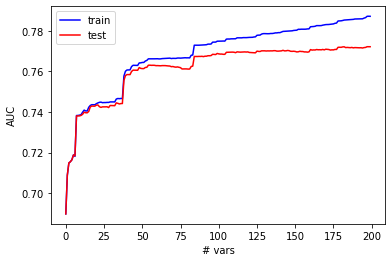

In [65]:
fs_scores = []
top_n_vars = 200
for i in range(1, top_n_vars+1):
    if i % 100 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = LogisticRegression()
    fs_scores.append(cross_validate(clf, train[top_n_predictors], train[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0, n_jobs=-1, return_train_score=True))

# How the AUC curve looks like when adding top vars
plt.plot([s['train_score'].mean() for s in fs_scores], color='blue')
plt.plot([s['test_score'].mean() for s in fs_scores], color='red')
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.legend(['train', 'test'])
plt.show()

#### TOP 50 VARIABLES 

In [66]:
# Select the top variables based on Fisher Score
n_top_fs_vars = 50  # Top FS vars
top_fs_vars_50 = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars_50))
top_fs_vars_50

Selected # vars : 50


array(['Max_dly_binef_4.0', 'PAY_0_binef_4.0', 'Max_dly', 'PAY_0',
       'PAY_2_binef_3.0', 'avg_dly_binef_7.0', 'C_PAY_0_4.0',
       'Max_dly_bin_6', 'Max_dly_bin_9', 'C_PAY_2_4.0', 'PAY_3_binef_3.0',
       'avg_dly', 'PAY_4_binef_3.0', 'C_PAY_3_remap_8', 'C_PAY_3_4.0',
       'PAY_2', 'C_PAY_0_2.0', 'C_PAY_5_remap_7', 'C_PAY_4_remap_8',
       'C_PAY_4_4.0', 'C_PAY_6_remap_7', 'PAY_3', 'avg_dly_bin_20',
       'C_PAY_5_3.0', 'PAY_4', 'C_PAY_6_3.0', 'avg_dly_bin_28',
       'avg_dly_binef_5.0', 'PAY_5', 'avg_dly_binew_2.0',
       'Min_dly_bin_12', 'Min_dly_binew_6.0', 'avg_dly_binew_5.0',
       'PAY_6', 'avg_dly_binew_3.0', 'C_PAY_2_remap_5', 'C_PAY_2_2.0',
       'Max_dly_bin_10', 'LIMIT_BAL', 'Min_Pay', 'Min_dly',
       'avg_dly_binew_4.0', 'avg_dly_bin_27', 'avg_pay', 'total_pay',
       'avg_dly_bin_26', 'Max_dly_binew_5.0', 'avg_dly_binef_6.0',
       'total_pay_binef_9.0', 'total_pay_bin_28'], dtype=object)

In [67]:
y = train["default.payment.next.month"]
X = train.drop("default.payment.next.month", axis=1)

In [68]:
X = X[top_fs_vars_50]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
tree = DecisionTreeClassifier()
logistic = LogisticRegression(solver = "lbfgs")
randomForest = RandomForestClassifier(n_estimators = 25, n_jobs=-1)
neighbors = KNeighborsClassifier()
boostedTree = GradientBoostingClassifier(n_estimators=100,random_state=0)

models = {"tree" :tree,
"logistic" :logistic,
"randomForest" :randomForest,
"boostedTree" :boostedTree,
#"neuralNet" :neuralNet,
"neighbors" :neighbors
}

In [70]:
from pandas import DataFrame
from numpy import array

for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

performances_train = {}
performances_test = {}


for model in models:
    predictions = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train))[1]
    accuracy = accuracy_score(y_train,predictions)
    auc = roc_auc_score(array(y_train),array(probabilities))
    performances_train[model] = {"Accuracy":accuracy,"AUC":auc}


for model in models:
    predictions = models[model].predict(X_test)
    probabilities = DataFrame(models[model].predict_proba(X_test))[1]
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(array(y_test),array(probabilities))
    performances_test[model] = {"Accuracy":accuracy,"AUC":auc}

tree has been trained successfully
logistic has been trained successfully


C:\Users\kamal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


randomForest has been trained successfully
boostedTree has been trained successfully
neighbors has been trained successfully


In [71]:
print(performances_train)
print(performances_test)

{'tree': {'Accuracy': 0.9898571428571429, 'AUC': 0.9996209487985354}, 'logistic': {'Accuracy': 0.8155714285714286, 'AUC': 0.7606983172072104}, 'randomForest': {'Accuracy': 0.9864285714285714, 'AUC': 0.998146129272311}, 'boostedTree': {'Accuracy': 0.8257857142857142, 'AUC': 0.7924287121135263}, 'neighbors': {'Accuracy': 0.8417142857142857, 'AUC': 0.8747131759905827}}
{'tree': {'Accuracy': 0.7238333333333333, 'AUC': 0.6131825690150624}, 'logistic': {'Accuracy': 0.8246666666666667, 'AUC': 0.7688229545494581}, 'randomForest': {'Accuracy': 0.7975, 'AUC': 0.7193515944852271}, 'boostedTree': {'Accuracy': 0.8245, 'AUC': 0.7752472618534502}, 'neighbors': {'Accuracy': 0.7963333333333333, 'AUC': 0.7112327077506222}}


#### TOP 100 Variables 

In [72]:
# Select the top variables based on Fisher Score
n_top_fs_vars = 100  # Top FS vars
top_fs_vars = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 100


array(['Max_dly_binef_4.0', 'PAY_0_binef_4.0', 'Max_dly', 'PAY_0',
       'PAY_2_binef_3.0', 'avg_dly_binef_7.0', 'C_PAY_0_4.0',
       'Max_dly_bin_6', 'Max_dly_bin_9', 'C_PAY_2_4.0', 'PAY_3_binef_3.0',
       'avg_dly', 'PAY_4_binef_3.0', 'C_PAY_3_remap_8', 'C_PAY_3_4.0',
       'PAY_2', 'C_PAY_0_2.0', 'C_PAY_5_remap_7', 'C_PAY_4_remap_8',
       'C_PAY_4_4.0', 'C_PAY_6_remap_7', 'PAY_3', 'avg_dly_bin_20',
       'C_PAY_5_3.0', 'PAY_4', 'C_PAY_6_3.0', 'avg_dly_bin_28',
       'avg_dly_binef_5.0', 'PAY_5', 'avg_dly_binew_2.0',
       'Min_dly_bin_12', 'Min_dly_binew_6.0', 'avg_dly_binew_5.0',
       'PAY_6', 'avg_dly_binew_3.0', 'C_PAY_2_remap_5', 'C_PAY_2_2.0',
       'Max_dly_bin_10', 'LIMIT_BAL', 'Min_Pay', 'Min_dly',
       'avg_dly_binew_4.0', 'avg_dly_bin_27', 'avg_pay', 'total_pay',
       'avg_dly_bin_26', 'Max_dly_binew_5.0', 'avg_dly_binef_6.0',
       'total_pay_binef_9.0', 'total_pay_bin_28', 'C_PAY_3_2.0',
       'PAY_3_binef_2.0', 'Min_Pay_bin_7', 'Min_Pay_bin_8',
      

In [73]:
y = train["default.payment.next.month"]
X = train.drop("default.payment.next.month", axis=1)

In [74]:
y1 = train["default.payment.next.month"]
X1 = train.drop("default.payment.next.month", axis=1)

In [75]:
X = X[top_fs_vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
tree = DecisionTreeClassifier()
logistic = LogisticRegression(solver = "lbfgs")
randomForest = RandomForestClassifier(n_estimators = 25, n_jobs=-1)
neighbors = KNeighborsClassifier()
boostedTree = GradientBoostingClassifier(n_estimators=100,random_state=0)

models = {"tree" :tree,
"logistic" :logistic,
"randomForest" :randomForest,
"boostedTree" :boostedTree,
"neighbors" :neighbors
}

In [77]:
from pandas import DataFrame
from numpy import array

for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

performances_train1 = {}
performances_test1 = {}


for model in models:
    predictions = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train))[1]
    accuracy = accuracy_score(y_train,predictions)
    auc = roc_auc_score(array(y_train),array(probabilities))
    performances_train1[model] = {"Accuracy":accuracy,"AUC":auc}


for model in models:
    predictions = models[model].predict(X_test)
    probabilities = DataFrame(models[model].predict_proba(X_test))[1]
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(array(y_test),array(probabilities))
    performances_test1[model] = {"Accuracy":accuracy,"AUC":auc}

tree has been trained successfully


C:\Users\kamal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
neighbors has been trained successfully


#### TOP 200 VARIABLES 

In [78]:
# Select the top variables based on Fisher Score
n_top_fs_vars = 200  # Top FS vars
top_fs_vars_200 = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars_200))
top_fs_vars_200

Selected # vars : 200


array(['Max_dly_binef_4.0', 'PAY_0_binef_4.0', 'Max_dly', 'PAY_0',
       'PAY_2_binef_3.0', 'avg_dly_binef_7.0', 'C_PAY_0_4.0',
       'Max_dly_bin_6', 'Max_dly_bin_9', 'C_PAY_2_4.0', 'PAY_3_binef_3.0',
       'avg_dly', 'PAY_4_binef_3.0', 'C_PAY_3_remap_8', 'C_PAY_3_4.0',
       'PAY_2', 'C_PAY_0_2.0', 'C_PAY_5_remap_7', 'C_PAY_4_remap_8',
       'C_PAY_4_4.0', 'C_PAY_6_remap_7', 'PAY_3', 'avg_dly_bin_20',
       'C_PAY_5_3.0', 'PAY_4', 'C_PAY_6_3.0', 'avg_dly_bin_28',
       'avg_dly_binef_5.0', 'PAY_5', 'avg_dly_binew_2.0',
       'Min_dly_bin_12', 'Min_dly_binew_6.0', 'avg_dly_binew_5.0',
       'PAY_6', 'avg_dly_binew_3.0', 'C_PAY_2_remap_5', 'C_PAY_2_2.0',
       'Max_dly_bin_10', 'LIMIT_BAL', 'Min_Pay', 'Min_dly',
       'avg_dly_binew_4.0', 'avg_dly_bin_27', 'avg_pay', 'total_pay',
       'avg_dly_bin_26', 'Max_dly_binew_5.0', 'avg_dly_binef_6.0',
       'total_pay_binef_9.0', 'total_pay_bin_28', 'C_PAY_3_2.0',
       'PAY_3_binef_2.0', 'Min_Pay_bin_7', 'Min_Pay_bin_8',
      

In [79]:
y = train["default.payment.next.month"]
X = train.drop("default.payment.next.month", axis=1)

In [80]:
X = X[top_fs_vars_200]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
tree = DecisionTreeClassifier()
logistic = LogisticRegression(solver = "lbfgs")
randomForest = RandomForestClassifier(n_estimators = 25, n_jobs=-1)
neighbors = KNeighborsClassifier()
boostedTree = GradientBoostingClassifier(n_estimators=100,random_state=0)

models = {"tree" :tree,
"logistic" :logistic,
"randomForest" :randomForest,
"boostedTree" :boostedTree,
"neighbors" :neighbors
}

In [82]:
from pandas import DataFrame
from numpy import array

for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

performances_train2 = {}
performances_test2 = {}


for model in models:
    predictions = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train))[1]
    accuracy = accuracy_score(y_train,predictions)
    auc = roc_auc_score(array(y_train),array(probabilities))
    performances_train2[model] = {"Accuracy":accuracy,"AUC":auc}


for model in models:
    predictions = models[model].predict(X_test)
    probabilities = DataFrame(models[model].predict_proba(X_test))[1]
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(array(y_test),array(probabilities))
    performances_test2[model] = {"Accuracy":accuracy,"AUC":auc}

tree has been trained successfully


C:\Users\kamal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
neighbors has been trained successfully


In [83]:
print(performances_train)
print(performances_test)

{'tree': {'Accuracy': 0.9898571428571429, 'AUC': 0.9996209487985354}, 'logistic': {'Accuracy': 0.8155714285714286, 'AUC': 0.7606983172072104}, 'randomForest': {'Accuracy': 0.9864285714285714, 'AUC': 0.998146129272311}, 'boostedTree': {'Accuracy': 0.8257857142857142, 'AUC': 0.7924287121135263}, 'neighbors': {'Accuracy': 0.8417142857142857, 'AUC': 0.8747131759905827}}
{'tree': {'Accuracy': 0.7238333333333333, 'AUC': 0.6131825690150624}, 'logistic': {'Accuracy': 0.8246666666666667, 'AUC': 0.7688229545494581}, 'randomForest': {'Accuracy': 0.7975, 'AUC': 0.7193515944852271}, 'boostedTree': {'Accuracy': 0.8245, 'AUC': 0.7752472618534502}, 'neighbors': {'Accuracy': 0.7963333333333333, 'AUC': 0.7112327077506222}}


In [84]:
print(performances_train1)
print(performances_test1)

{'tree': {'Accuracy': 0.9914285714285714, 'AUC': 0.9997265694889094}, 'logistic': {'Accuracy': 0.8172857142857143, 'AUC': 0.7740202995167309}, 'randomForest': {'Accuracy': 0.988, 'AUC': 0.9986912554045898}, 'boostedTree': {'Accuracy': 0.826, 'AUC': 0.8025246592357427}, 'neighbors': {'Accuracy': 0.8429285714285715, 'AUC': 0.8778118376371997}}
{'tree': {'Accuracy': 0.7295, 'AUC': 0.6211374198789819}, 'logistic': {'Accuracy': 0.8228333333333333, 'AUC': 0.7718594766916341}, 'randomForest': {'Accuracy': 0.8061666666666667, 'AUC': 0.7393145175301015}, 'boostedTree': {'Accuracy': 0.8255, 'AUC': 0.7789265137076616}, 'neighbors': {'Accuracy': 0.7966666666666666, 'AUC': 0.7193617760220283}}


In [85]:
print(performances_train2)
print(performances_test2)

{'tree': {'Accuracy': 0.993, 'AUC': 0.9998272375875967}, 'logistic': {'Accuracy': 0.8195714285714286, 'AUC': 0.7869410922433844}, 'randomForest': {'Accuracy': 0.9906428571428572, 'AUC': 0.9989616461513218}, 'boostedTree': {'Accuracy': 0.8276428571428571, 'AUC': 0.8057435176135365}, 'neighbors': {'Accuracy': 0.842, 'AUC': 0.8752155823125336}}
{'tree': {'Accuracy': 0.715, 'AUC': 0.6008591924166622}, 'logistic': {'Accuracy': 0.8221666666666667, 'AUC': 0.7769660830383516}, 'randomForest': {'Accuracy': 0.8106666666666666, 'AUC': 0.74888912160973}, 'boostedTree': {'Accuracy': 0.8278333333333333, 'AUC': 0.7779502174566165}, 'neighbors': {'Accuracy': 0.7921666666666667, 'AUC': 0.7235666699150618}}


In [86]:
df1 = pd.DataFrame.from_dict(performances_test1, orient='index').drop("Accuracy",axis=1)
df1 = df1.rename(columns={"AUC": "Top 100 Variables"})

df2 = pd.DataFrame.from_dict(performances_test, orient='index').drop("Accuracy",axis=1)
df2 = df2.rename(columns={"AUC": "Top 50 Variables"})

df3 = pd.DataFrame.from_dict(performances_test2, orient='index').drop("Accuracy",axis=1)
df3 = df3.rename(columns={"AUC": "Top 200 Variables"})

In [87]:
feature_selection_comparison = pd.concat([df1, df2,df3], axis=1)
feature_selection_comparison

,Top 100 Variables,Top 50 Variables,Top 200 Variables
tree,0.621137,0.613183,0.600859
logistic,0.771859,0.768823,0.776966
randomForest,0.739315,0.719352,0.748889
boostedTree,0.778927,0.775247,0.777950
neighbors,0.719362,0.711233,0.723567


### Taking The top 100 Important variables 

In [ ]:
X = X[top_fs_vars]

### Cross Validation with K-Fold 5 For Top 3 Models 

In [ ]:
#Logistic Regression
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
AUC_1 = list()
AUC_2 = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = LogisticRegression(solver = "lbfgs")
    # define search space
    space = dict()
    # define search
    search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    auc_test =DataFrame(best_model.predict_proba(X_test))[1]
    # evaluate the model
    acc = roc_auc_score(array(y_test),array(auc_test))
    # store the result
    AUC_1.append(acc)
    AUC_2.append(result.best_score_)
    # report progress
    print('>AUC=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('AUC TEST MEAN: %.3f (%.3f)' % (mean(AUC_1), std(AUC_1)))
print('AUC TRAIN MEAN: %.3f (%.3f)' % (mean(AUC_2), std(AUC_2)))

In [ ]:
#Random Forest
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
AUC_TEST = list()
AUC_TRAIN = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [10, 100, 500]
    space['max_features'] = [2, 4, 6]
    # define search
    search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    auc_test =DataFrame(best_model.predict_proba(X_test))[1]
    # evaluate the model
    acc = roc_auc_score(array(y_test),array(auc_test))
    # store the result
    AUC_TEST.append(acc)
    AUC_TRAIN.append(result.best_score_)
    # report progress
    print('>AUC=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('AUC TEST MEAN: %.3f (%.3f)' % (mean(AUC_TEST), std(AUC_TEST)))
print('AUC TRAIN MEAN: %.3f (%.3f)' % (mean(AUC_TRAIN), std(AUC_TRAIN)))

In [ ]:
#Gradient Boosted Tree 
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
AUC_TEST_GB = list()
AUC_TRAIN_GB = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=2, shuffle=True, random_state=1)
    # define the model
    model = GradientBoostingClassifier(random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [50,100,500,1000]
    space['max_depth'] = [5,7,10,12,15]
    space['learning_rate'] = [0.001,0.01,0.1]
    # define search
    search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    auc_test =DataFrame(best_model.predict_proba(X_test))[1]
    # evaluate the model
    acc = roc_auc_score(array(y_test),array(auc_test))
    # store the result
    AUC_TEST_GB.append(acc)
    AUC_TRAIN_GB.append(result.best_score_)
    # report progress
    print('>AUC=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('AUC TEST MEAN: %.3f (%.3f)' % (mean(AUC_TEST_GB), std(AUC_TEST_GB)))
print('AUC TRAIN MEAN: %.3f (%.3f)' % (mean(AUC_TRAIN_GB), std(AUC_TRAIN_GB)))

### Plotting Learning Curve

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[1].grid()
    axes[1].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[1].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[1].set_xlabel("fit_times")
    axes[1].set_ylabel("Score")
    axes[1].set_title("Performance of the model")

    return plt


In [ ]:
from sklearn.datasets import load_digits
fig, axes = plt.subplots(2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (GBM)"
estimator = GradientBoostingClassifier(n_estimators=500, max_depth =5, learning_rate = 0.01)
plot_learning_curve(estimator, title, X, y, axes=axes[:,], cv=5, n_jobs=4)

### Predicting Test For Kaggle Submission 

In [ ]:
%%time
GBT = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth = 5,random_state=1)

# split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
GBT.fit(X_train, y_train)

# predict probabilities
pred_train = GBT.predict(X_train)
pred_test = GBT.predict(X_test)

# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"GBT": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}

In [ ]:
auc_test =DataFrame(GBT.predict_proba(X_test))[1]
auc = roc_auc_score(array(y_test),array(auc_test))

In [ ]:
#Rechecking AUC 
auc

In [ ]:
eval_dict

In [ ]:
test1 = test[top_fs_vars]
probabilities = DataFrame(GBT.predict_proba(test1))[1]

In [ ]:
boost_sub = pd.concat([test['cust_id'], probabilities], axis=1)
boost_sub = boost_sub.set_axis(['cust_id', 'default.payment.next.month'], axis=1)

In [ ]:
boost_sub.to_csv('Kaggle_Submission_GBM.csv', index = False)

### References

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

https://machinelearningmastery.com/discretization-transforms-for-machine-learning/

https://scikit-learn.org/stable/modules/cross_validation.html

https://datascientest.com/feature-engineering

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
